# 590 PR Final Project

## Title: Analysis of the relationship between consumption of various fuel resources and climate change in the US.

### Description:

United States Government reports on consumption, production, expenditures, and prices of various fuel sources. Basic climate factors are also reported by National Centers for Environmental Information. This project will analyze how the consumption of different types of fuel resources influences the climate in the US with a time span of 30 years (1984-2014). 


#### Hypothesis 1:  The growth of the consumption of fuel resources is positively corelated with the warmth of the nationwide climate which can be reflected by multiple factors.  

#### Hypothesis 2:  Different purposes ( commercial, industrial, residential) of fuel consumptions contribute to the climate change in different degrees. 

### Data Sources:

https://think.cs.vt.edu/corgis/csv/energy/

https://www.ncei.noaa.gov/access/search/data-search/global-summary-of-the-year?pageSize=100

## First, data reformatting
There are two datasets in this project, the energy data that contains all the fuel consumption information in different states over differernt years.
GSOY_dataset is a file that inclueds several meteorological measurements which are collected by stations scattered all over the country.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
energy_df = pd.read_csv('energy.csv')
energy_df['Year'] = energy_df['Year'].astype(int)
year_filter = energy_df['Year'] >= 1984 # the time span is 1984 - 2014
energy_df = energy_df[year_filter]
energy_df.head()

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Liquefied Petroleum Gases,Consumption.Commercial.Natural Gas,...,Price.Industrial.Coal,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Liquefied Petroleum Gases,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Liquefied Petroleum Gases,Price.Transportation.Natural Gas
1224,Utah,1984,285333.0,4855.0,3875.0,0.0,0.0,17.0,1160.0,9213.0,...,1.79,6.67,7.11,6.35,3.27,6.69,0.0,7.11,5.87,0.0
1225,Vermont,1984,0.0,305.0,2897.0,0.0,0.0,82.0,713.0,1455.0,...,2.39,6.91,7.37,7.04,5.22,13.48,0.0,9.44,6.51,0.0
1226,Rhode Island,1984,0.0,142.0,3955.0,0.0,0.0,64.0,245.0,7690.0,...,2.39,7.29,7.72,6.29,5.65,7.72,0.0,8.70,5.82,0.0
1227,Michigan,1984,0.0,5747.0,17807.0,0.0,0.0,66.0,1677.0,164627.0,...,2.07,6.61,7.50,6.41,4.82,10.23,0.0,8.65,5.92,0.0
1228,Missouri,1984,137916.0,2230.0,11602.0,0.0,0.0,129.0,2887.0,68373.0,...,1.62,6.61,7.11,7.00,4.73,8.55,0.0,7.29,6.47,0.0


In [3]:
climate_df = pd.read_csv('GSOY_dataset.csv')
climate_df.head()

,STATION,DATE,AWND,DT00,DT32,DX32,DX70,DX90,PRCP,TAVG,TMAX
0,USW00053819,1997,NaN,0.0,59.0,1.0,201.0,27.0,NaN,59.6,71.0
1,USW00053819,1998,NaN,0.0,51.0,0.0,231.0,65.0,NaN,62.3,74.0
2,USW00053819,1999,4.0,0.0,74.0,2.0,231.0,49.0,41.41,60.9,73.8
3,USW00053819,2000,4.0,0.0,79.0,1.0,230.0,57.0,36.98,60.1,72.9
4,USW00053819,2001,3.6,0.0,73.0,0.0,235.0,14.0,36.98,60.3,72.9


By looking at the dataframe above, we cannnot know exactly the state each row is measuring. Thus, another metadata that contains the information of the stations are need to convert the stations ID to a specific name of a state. In addition, we also need to abstract the data from 1984 to 2014.

In [4]:
# open the file. 
f = open('ghcnd-stations_metadata.txt', 'r')

In [5]:
station_metadata_file = f.read().split('\n')
station_metadata_file

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       ',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    ',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990',
 'AG000060390  36.7167    3.2500   24.0    ALGER-DAR EL BEIDA             GSN     60390',
 'AG000060

In [6]:
station_metadata_list = []
for line in station_metadata_file: 
    line  = line.split()
#     print(line)
    station_metadata_list.append(line)
station_metadata_df = pd.DataFrame(station_metadata_list)
station_metadata_df.columns = ['Station','Longitude','Latitude','3','State', '5', '6', '7','8','9','10','11','12']
station_metadata_df = station_metadata_df[['Station','Longitude','Latitude','State']]
station_metadata_df.head()

,Station,Longitude,Latitude,State
0,ACW00011604,17.1167,-61.7833,ST
1,ACW00011647,17.1333,-61.7833,ST
2,AE000041196,25.3330,55.5170,SHARJAH
3,AEM00041194,25.2550,55.3640,DUBAI
4,AEM00041217,24.4330,54.6510,ABU


In [7]:
climate_df = pd.merge(climate_df, station_metadata_df, how='left', left_on='STATION', right_on = "Station")

In [8]:
climate_df = climate_df.drop(['Station'], axis=1)
climate_df.head()

,STATION,DATE,AWND,DT00,DT32,DX32,DX70,DX90,PRCP,TAVG,TMAX,Longitude,Latitude,State
0,USW00053819,1997,NaN,0.0,59.0,1.0,201.0,27.0,NaN,59.6,71.0,33.3633,-84.5658,GA
1,USW00053819,1998,NaN,0.0,51.0,0.0,231.0,65.0,NaN,62.3,74.0,33.3633,-84.5658,GA
2,USW00053819,1999,4.0,0.0,74.0,2.0,231.0,49.0,41.41,60.9,73.8,33.3633,-84.5658,GA
3,USW00053819,2000,4.0,0.0,79.0,1.0,230.0,57.0,36.98,60.1,72.9,33.3633,-84.5658,GA
4,USW00053819,2001,3.6,0.0,73.0,0.0,235.0,14.0,36.98,60.3,72.9,33.3633,-84.5658,GA


As we can see here, the names of states are not the same in these two files, one of them is using the full names, the other one is using abbreviations. Here I will read in a csv file that stores the state names anf their abbreviationd to convert the full names in energy_df. 

In [9]:
energy_df['State'].unique()

array(['Utah', 'Vermont', 'Rhode Island', 'Michigan', 'Missouri',
       'Kansas', 'Delaware', 'Massachusetts', 'Washington', 'Virginia',
       'Nevada', 'Texas', 'West Virginia', 'Kentucky', 'Ohio', 'New York',
       'South Dakota', 'Illinois', 'Iowa', 'Connecticut', 'Arkansas',
       'Colorado', 'Mississippi', 'Idaho', 'Minnesota', 'Arizona',
       'Oklahoma', 'Maine', 'Georgia', 'Hawaii', 'Wisconsin',
       'New Hampshire', 'North Carolina', 'New Mexico', 'California',
       'Montana', 'Wyoming', 'Pennsylvania', 'Tennessee', 'Indiana',
       'Florida', 'New Jersey', 'Alabama', 'South Carolina', 'Oregon',
       'Maryland', 'Louisiana', 'North Dakota', 'Nebraska',
       'District of Columbia', 'Alaska'], dtype=object)

In [10]:
climate_df['State'].unique()

array(['GA', 'CO', 'UT', 'WA', 'AK', 'WY', 'CA', 'TX', 'NE', 'SD', 'AL',
       'NM', 'ND', 'AZ', 'NV', 'OR', 'IL', 'MT', 'OH', 'MS', 'SC', 'FL',
       'MA', 'AR', 'TN', 'IN', 'LA', 'NC', 'KY', 'KS', 'WI', 'ME', 'MI',
       'DE', 'NH', 'MO', 'OK', 'PA', 'VA', 'NY', 'MD', 'MN', 'WV', 'IA',
       'NJ', 'HI', 'VT', 'CT', 'ID', 'RI'], dtype=object)

In [11]:
state_abbreviations = pd.read_csv('two-letter_states_abbreviation.csv')

In [12]:
state_abbreviations

,State,abb
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [13]:
energy_df = pd.merge(energy_df, state_abbreviations, how='left', left_on='State', right_on = "State")

In [14]:
energy_df.head()

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Liquefied Petroleum Gases,Consumption.Commercial.Natural Gas,...,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Liquefied Petroleum Gases,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Liquefied Petroleum Gases,Price.Transportation.Natural Gas,abb
0,Utah,1984,285333.0,4855.0,3875.0,0.0,0.0,17.0,1160.0,9213.0,...,6.67,7.11,6.35,3.27,6.69,0.0,7.11,5.87,0.0,UT
1,Vermont,1984,0.0,305.0,2897.0,0.0,0.0,82.0,713.0,1455.0,...,6.91,7.37,7.04,5.22,13.48,0.0,9.44,6.51,0.0,VT
2,Rhode Island,1984,0.0,142.0,3955.0,0.0,0.0,64.0,245.0,7690.0,...,7.29,7.72,6.29,5.65,7.72,0.0,8.70,5.82,0.0,RI
3,Michigan,1984,0.0,5747.0,17807.0,0.0,0.0,66.0,1677.0,164627.0,...,6.61,7.50,6.41,4.82,10.23,0.0,8.65,5.92,0.0,MI
4,Missouri,1984,137916.0,2230.0,11602.0,0.0,0.0,129.0,2887.0,68373.0,...,6.61,7.11,7.00,4.73,8.55,0.0,7.29,6.47,0.0,MO


To get the result of the whole country, I grouped the energy_df by years and calculate the sum of each column. the sum here is to add up all values in individual states. 

In [15]:
energy_year_df = energy_df.groupby(['Year'], as_index = False).sum()
energy_year_df.head()

,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Liquefied Petroleum Gases,Consumption.Commercial.Natural Gas,Consumption.Commercial.Solar,...,Price.Industrial.Coal,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Liquefied Petroleum Gases,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Liquefied Petroleum Gases,Price.Transportation.Natural Gas
0,1984,19914475.0,169172.0,735170.0,0.0,0.0,35863.0,83326.0,2593947.0,0.0,...,96.85,336.96,361.00,348.66,218.90,338.75,0.0,401.38,322.28,0.0
1,1985,19514302.0,137633.0,630888.0,0.0,0.0,32832.0,95098.0,2503331.0,0.0,...,96.05,323.55,347.02,485.73,209.49,339.24,0.0,395.81,511.74,0.0
2,1986,19676148.0,135642.0,623385.0,0.0,0.0,49925.0,93074.0,2382605.0,0.0,...,93.11,209.84,248.19,461.77,182.35,311.99,0.0,336.08,497.91,0.0
3,1987,20295490.0,127109.0,607480.0,0.0,0.0,48657.0,101511.0,2499089.0,0.0,...,87.73,231.17,241.32,436.68,169.17,312.47,0.0,351.09,482.26,0.0
4,1988,20949126.0,131183.0,599888.0,0.0,0.0,26117.0,99248.0,2743691.0,0.0,...,87.50,214.24,223.57,438.29,161.35,283.29,0.0,346.75,487.24,0.0


There are 6 types of consumptions of fuel resources, which are commercial, electric power, industrail, refinery, residential, tranportation consumptions. Among all of them, the fuel resources used in common are coal, distillate fuel oil and natural gas. Thus, we can take a look at the trend of consumption of these fuel respurces over a time span from 1984- 2014. 

In [16]:
# add up the number of coal consumed by different types of consumption. 
energy_year_df['Total.Consumption.Coal'] = energy_year_df['Consumption.Commercial.Coal'] + energy_year_df['Consumption.Electric Power.Coal'] + energy_year_df['Consumption.Industrial.Coal']+ energy_year_df['Consumption.Refinery.Coal'] + energy_year_df['Consumption.Residential.Coal'] + energy_year_df['Consumption.Transportation.Coal']
    
# add up the number of Distillate Fuel Oil consumed by different types of consumption. 
energy_year_df['Total.Consumption.Distillate Fuel Oil'] = energy_year_df['Consumption.Commercial.Distillate Fuel Oil'] + energy_year_df['Consumption.Electric Power.Distillate Fuel Oil'] + energy_year_df['Consumption.Industrial.Distillate Fuel Oil']+ energy_year_df['Consumption.Refinery.Distillate Fuel Oil'] + energy_year_df['Consumption.Residential.Distillate Fuel Oil'] + energy_year_df['Consumption.Transportation.Distillate Fuel Oil']

# add up the number of Natural Gas consumed by different types of consumption. 
energy_year_df['Total.Consumption.Natural Gas'] = energy_year_df['Consumption.Commercial.Natural Gas'] + energy_year_df['Consumption.Electric Power.Natural Gas']  + energy_year_df['Consumption.Industrial.Natural Gas']+ energy_year_df['Consumption.Refinery.Natural Gas'] + energy_year_df['Consumption.Residential.Natural Gas'] + energy_year_df['Consumption.Transportation.Natural Gas']


In [17]:
energy_year_df.head()

,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Liquefied Petroleum Gases,Consumption.Commercial.Natural Gas,Consumption.Commercial.Solar,...,Price.Industrial.Liquefied Petroleum Gases,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Liquefied Petroleum Gases,Price.Transportation.Natural Gas,Total.Consumption.Coal,Total.Consumption.Distillate Fuel Oil,Total.Consumption.Natural Gas
0,1984,19914475.0,169172.0,735170.0,0.0,0.0,35863.0,83326.0,2593947.0,0.0,...,348.66,218.90,338.75,0.0,401.38,322.28,0.0,17021355.0,6073541.0,19096263.0
1,1985,19514302.0,137633.0,630888.0,0.0,0.0,32832.0,95098.0,2503331.0,0.0,...,485.73,209.49,339.24,0.0,395.81,511.74,0.0,17547851.0,6102179.0,18348432.0
2,1986,19676148.0,135642.0,623385.0,0.0,0.0,49925.0,93074.0,2382605.0,0.0,...,461.77,182.35,311.99,0.0,336.08,497.91,0.0,17246576.0,6206265.0,17321321.0
3,1987,20295490.0,127109.0,607480.0,0.0,0.0,48657.0,101511.0,2499089.0,0.0,...,436.68,169.17,312.47,0.0,351.09,482.26,0.0,17955407.0,6333985.0,18376452.0
4,1988,20949126.0,131183.0,599888.0,0.0,0.0,26117.0,99248.0,2743691.0,0.0,...,438.29,161.35,283.29,0.0,346.75,487.24,0.0,18890400.0,6659681.0,19189609.0


Now that we have already got the data we need to plot the trand of consumption of three kinds of fuel resources, the average temperature of the whole country in different years are also needed.

In [18]:
# climate_year_tem = climate_df.groupby('DATE', as_index = False)['TAVG'].mean().drop(0)
climate_year_tem = climate_df.groupby('DATE', as_index = False)['TAVG'].mean()
# climate_year_tem['TAVG'] = climate_year_tem['TAVG'].rolling(4).mean()

climate_year_tem = climate_year_tem.reset_index(drop=True)
climate_year_tem

,DATE,TAVG
0,1-996,41.400000
1,1984,53.491384
2,1985,52.906579
3,1986,54.682842
4,1987,54.665435
5,1988,54.008267
6,1989,53.165026
7,1990,55.146859
8,1991,55.063588
9,1992,54.068052


Plot the consumptions of 3 fuel resources and the average tempreture in a single pplot but with two different y-axces to whether their trends align. 

ValueError: x and y must have same first dimension, but have shapes (31,) and (32,)

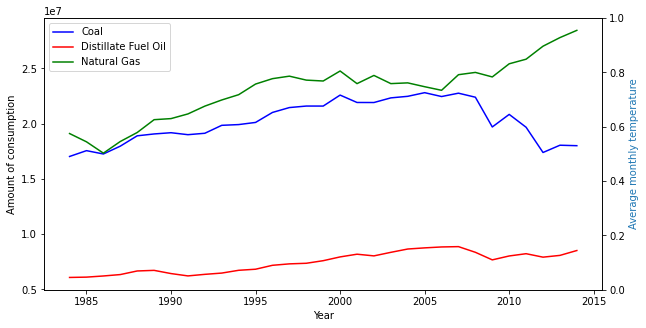

In [19]:
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount of consumption', color='black')
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Consumption.Coal'], color='blue',label = "Coal")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Consumption.Distillate Fuel Oil'], color='red', label = "Distillate Fuel Oil")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Consumption.Natural Gas'], color='green',label = "Natural Gas")
ax1.tick_params(axis='y', labelcolor='black')
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average monthly temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(energy_year_df["Year"], climate_year_tem['TAVG'], color=color,marker='o', label = "Average Temperature")
ax2.tick_params(axis='y', labelcolor=color)
# plt.legend(side = 'right')

plt.legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The average monthly temperature used by the plot above is just only one aspect of the nationwide climate. To get a more reliable result, I want to use another factor in the dataset that is number of days with maximum temperature equal or greater than 32.2C/ 90F. 

In [ ]:
# climate_year_nd90 = climate_df.groupby('DATE', as_index = False)['DX70'].mean().drop(0)
climate_year_nd90 = climate_df.groupby('DATE', as_index = False)['DX70'].mean()
climate_year_nd90

In [ ]:
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount of consumption', color='black')
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Consumption.Coal'], color='blue',label = "Coal")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Consumption.Distillate Fuel Oil'], color='red', label = "Distillate Fuel Oil")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Consumption.Natural Gas'], color='green',label = "Natural Gas")
ax1.tick_params(axis='y', labelcolor='black')
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of days', color=color)  # we already handled the x-label with ax1
ax2.plot(energy_year_df["Year"], climate_year_nd90['DX70'], color=color,marker='o', label = "Number of days with temperature >= 90F")
ax2.tick_params(axis='y', labelcolor=color)
# plt.legend(side = 'right')

plt.legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Linear Regression Analysis. 

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [ ]:
# conda install -c conda-forge statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
target = pd.DataFrame(climate_year_tem, columns=["TAVG"])
target

In [ ]:
X = energy_year_df[['Total.Consumption.Coal', 'Total.Consumption.Distillate Fuel Oil', 'Total.Consumption.Natural Gas']]
y = target['TAVG']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

As we can see in the line plot, the average temperature over these years fluctuates a lot and doesn't seem to perfectly follow a linear model and has a peridical change. However, when we look at the over all trend of the change of temperature, it does show the nationwide warmth has been occuring. Among these three fuel resources, the consumption of all of them had a steady increase untill 2008 or so, later on, the consumption of coal droped dradually while the natual gas and distillate fuel oil consumption kept going up. 

What's more, I have conducted a linear regression analysis on the data with the consunption of these three fuel resources being the independent variables and the average nationwide temperature being the response variable. 
At a significant level of 0.05, we can conclude from the linear regression result that the temperature is positively related with the rise of the consumption of coal and natural gas yet negetively affected by the consumption of distillate fuel oil. Using these three independent variables explained 99.2% of the variability of the temperature. 


From the analysis above, we have found evidence to prove the hypothesis 1 is true. 

## Hypothesis 2

In the analysis targeted on hypothesis 1, I mainly focused on the nationwide warmth. For this part of the project, the nationwide total annual precipitation is what I want to focus on. 

In [ ]:
energy_year_df.head()

Add up the total consumption of different purposes. 

In [ ]:
energy_year_df['Total.Commercial.Consumption'] = \
energy_year_df['Consumption.Commercial.Coal'] \
+ energy_year_df['Consumption.Commercial.Distillate Fuel Oil']\
+ energy_year_df['Consumption.Commercial.Geothermal']\
+ energy_year_df['Consumption.Commercial.Hydropower']\
+ energy_year_df['Consumption.Commercial.Kerosene']\
+ energy_year_df['Consumption.Commercial.Liquefied Petroleum Gases']\
+ energy_year_df['Consumption.Commercial.Natural Gas']\
+ energy_year_df['Consumption.Commercial.Solar']\
+ energy_year_df['Consumption.Commercial.Wind']\
+ energy_year_df['Consumption.Commercial.Wood']

In [ ]:
energy_year_df['Total.Electric Power.Consumption'] = \
energy_year_df['Consumption.Electric Power.Coal'] \
+ energy_year_df['Consumption.Electric Power.Distillate Fuel Oil']\
+ energy_year_df['Consumption.Electric Power.Natural Gas']\
+ energy_year_df['Consumption.Electric Power.Wood']

In [ ]:
energy_year_df['Total.Industrial.Consumption'] = \
energy_year_df['Consumption.Industrial.Coal'] \
+ energy_year_df['Consumption.Industrial.Distillate Fuel Oil']\
+ energy_year_df['Consumption.Industrial.Geothermal']\
+ energy_year_df['Consumption.Industrial.Hydropower']\
+ energy_year_df['Consumption.Industrial.Kerosene']\
+ energy_year_df['Consumption.Industrial.Liquefied Petroleum Gases']\
+ energy_year_df['Consumption.Industrial.Natural Gas']\
+ energy_year_df['Consumption.Industrial.Solar']\
+ energy_year_df['Consumption.Industrial.Wind']\
+ energy_year_df['Consumption.Industrial.Wood']\
+ energy_year_df['Consumption.Industrial.Other Petroleum Products']

In [ ]:
energy_year_df['Total.Refinery.Consumption'] = \
energy_year_df['Consumption.Refinery.Coal'] \
+ energy_year_df['Consumption.Refinery.Distillate Fuel Oil']\
+ energy_year_df['Consumption.Refinery.Liquefied Petroleum Gases']\
+ energy_year_df['Consumption.Refinery.Natural Gas']

In [ ]:
energy_year_df['Total.Residential.Consumption'] = \
energy_year_df['Consumption.Residential.Coal'] \
+ energy_year_df['Consumption.Residential.Distillate Fuel Oil']\
+ energy_year_df['Consumption.Residential.Geothermal']\
+ energy_year_df['Consumption.Residential.Kerosene']\
+ energy_year_df['Consumption.Residential.Liquefied Petroleum Gases']\
+ energy_year_df['Consumption.Residential.Natural Gas']\
+ energy_year_df['Consumption.Residential.Wood']

In [ ]:
energy_year_df['Total.Transportation.Consumption'] = \
energy_year_df['Consumption.Transportation.Coal'] \
+ energy_year_df['Consumption.Transportation.Distillate Fuel Oil']\
+ energy_year_df['Consumption.Transportation.Liquefied Petroleum Gases']\
+ energy_year_df['Consumption.Transportation.Natural Gas']

In [ ]:
energy_year_df.head()

In [ ]:
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount of consumption', color='black')
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Commercial.Consumption'], color='blue',label = "Commercial")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Electric Power.Consumption'], color='red', label = "Electric Power")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Industrial.Consumption'], color='green',label = "Industrial")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Refinery.Consumption'], color='yellow',label = "Refinery")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Residential.Consumption'], color='gray', label = "Residential")
ax1.plot(energy_year_df["Year"], energy_year_df['Total.Transportation.Consumption'], color='brown',label = "Transportation")
ax1.tick_params(axis='y', labelcolor='black')
plt.legend()
plt.show()

Electric power consumes the most fuel resources.

## Dynamic bar chart

https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
# TEPC means total elctric power consumption. 
energy_df['TEPC'] = \
energy_df['Consumption.Electric Power.Coal'] \
+ energy_df['Consumption.Electric Power.Distillate Fuel Oil']\
+ energy_df['Consumption.Electric Power.Natural Gas']\
+ energy_df['Consumption.Electric Power.Wood']

In [ ]:
energy_df.head()

In [ ]:
df = energy_df[['State','Year','TEPC']]

In [ ]:
df = df[~(df == 0).any(axis=1)]
df.head()

In [ ]:
end_year = 2014
dff = (df[df['Year'].eq(end_year)]
       .sort_values(by='TEPC', ascending=True)
       .head(10))
dff

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df[df['Year'].eq(year)].sort_values(by='TEPC', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['State'], dff['TEPC'])
    dx = dff['TEPC'].max() / 200
    for i, (TEPC, State) in enumerate(zip(dff['TEPC'], dff['State'])):
        ax.text(TEPC-dx, i,     State,           size=14, weight=600, ha='right', va='bottom')
        ax.text(TEPC+dx, i,     f'{TEPC:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Total consumption of electric power (BTU)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The states consume the most electric power from 1984 to 2014',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1984, 2014))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()

In [ ]:
climate_percipitation_df = climate_df.groupby(['DATE','State'], as_index = False)['PRCP'].mean()

In [ ]:
# climate_percipitation_df
percipitation_df = climate_percipitation_df.drop(0).reset_index(drop=True)
percipitation_df['DATE'] = percipitation_df['DATE'].astype(int)
percipitation_df.head()

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart1(year):
    dff = percipitation_df[percipitation_df['DATE'].eq(year)].sort_values(by='PRCP', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['State'], dff['PRCP'])
    dx = dff['PRCP'].max() / 200
    for i, (PRCP, State) in enumerate(zip(dff['PRCP'], dff['State'])):
        ax.text(PRCP-dx, i,     State,           size=14, weight=600, ha='right', va='bottom')
        ax.text(PRCP+dx, i,     f'{PRCP:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Percipitation', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Top 10 states with the most precipitation from 1984 to 2014',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)


In [ ]:
animator = animation.FuncAnimation(fig, draw_barchart1, frames=range(1984, 2014))
HTML(animator.to_jshtml()) 

## Hyphothesis Test 2

In [ ]:
energy_year_df

In [ ]:
PRCP = percipitation_df.groupby(['DATE'], as_index = False).mean()
PRCP

In [ ]:
energy_year_df["PRCP"] = PRCP['PRCP']

In [ ]:
df2 = energy_year_df[energy_year_df.columns[-7:]]
df2['DATE'] = PRCP['DATE']

In [ ]:
df2

In [ ]:
X = df2[['Total.Commercial.Consumption', 'Total.Electric Power.Consumption', 'Total.Industrial.Consumption', 'Total.Refinery.Consumption', 'Total.Residential.Consumption', 'Total.Transportation.Consumption']]
y = df2['PRCP']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

By looking at the results of the linear regression analysis, we cna see that different types of consumptions have various effact on the annual precipitation. The consumption of fuel resources for electic power, refinery and residential is positively related with the precipitation while commercial, industrail and transportation is negatively related. Since refinery has the largest coefficient numbe and the p- value is rather small, we can conclude that among all these independent variables, the response variable precipitaion is influenced by the refinery the most. The linear regression has explained 99.4% of the variability  of the precipitation. 


Hence, we tend to accept the second hypothesis to be true.  